 # EDA
 

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('C:\\Users\\04ama\\OneDrive\\chemistry\\ADHD_SEX_Prediction\\data\\preprocessed data\\processed_data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  1213 non-null   object
 1   ADHD_Outcome    1213 non-null   int64 
 2   Sex_F           1213 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 28.6+ KB


In [ ]:
print(f"Preprocessed data shape: {df.shape}")
print(f"Total columns: {len(df.columns)}")

In [3]:
print("\nData Quality Check:")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Data types: {df.dtypes.value_counts()}")



Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems',
       ...
       'conn_pca_3', 'conn_pca_4', 'conn_pca_5', 'conn_pca_6', 'conn_pca_7',
       'conn_pca_8', 'conn_pca_9', 'conn_pca_10', 'ADHD_Outcome', 'Sex_F'],
      dtype='object', length=192)

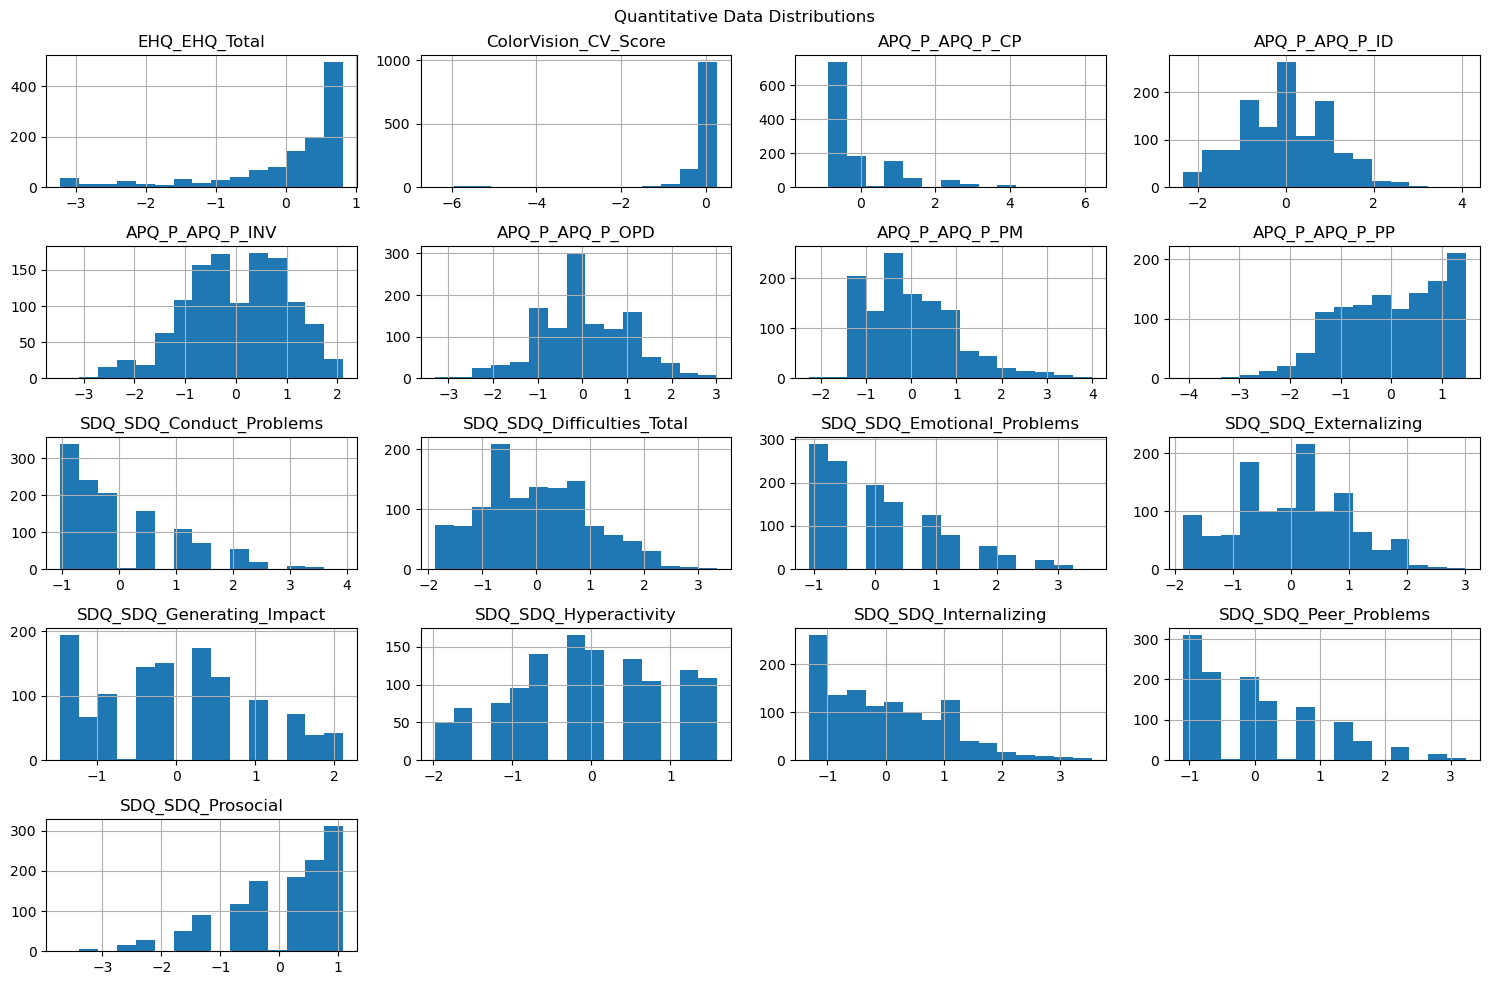

In [8]:
print("\nQuantitative Features Distribution:")
quant_cols = df.columns[1:18]  # Adjust based on your actual quantitative columns
df[quant_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Quantitative Features Distribution (Post-Preprocessing)')
plt.tight_layout()
plt.show()


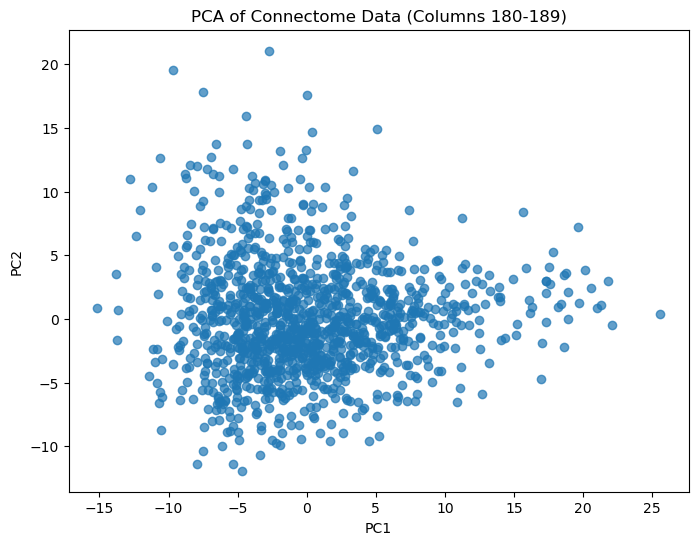

In [9]:
print("\nConnectome PCA Components:")
pca_cols = [col for col in df.columns if col.startswith('conn_pca_')]
if len(pca_cols) >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[pca_cols[0]], df[pca_cols[1]], alpha=0.7)
    plt.xlabel(pca_cols[0])
    plt.ylabel(pca_cols[1])
    plt.title('First Two PCA Components of Connectome Data')
    plt.show()
else:
    print("PCA components not found in expected format")


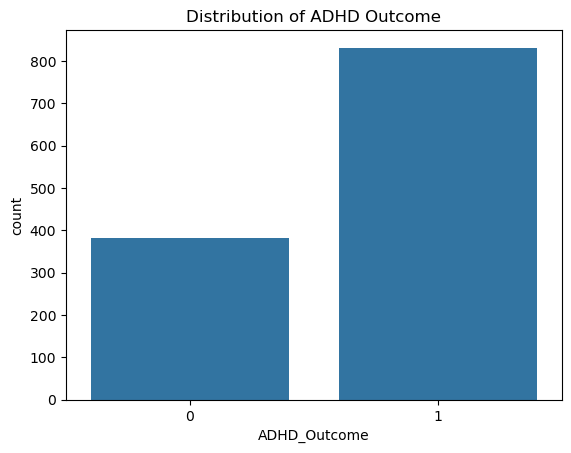

In [10]:
#countplot of target variable 
print("\nTarget Variable Distribution:")
target_col = 'ADHD_Outcome'
if target_col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=target_col)
    plt.title('ADHD Outcome Distribution')
    plt.show()
    
    print(f"Class distribution:")
    print(df[target_col].value_counts())
    print(f"Class proportions:")
    print(df[target_col].value_counts(normalize=True))


In [11]:
df.to_csv('baseline_dataset.csv', index=False)


In [13]:
target_col = 'ADHD_Outcome'  # Update if needed
X = df.drop(columns=[target_col, 'participant_id'], axis =1) 
y = df[target_col]



In [ ]:
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# 1. Logistic Regression
print("\n1. LOGISTIC REGRESSION")
print("-" * 30)
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}')
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
print(f"Precision (Class 1): {report_lr['1']['precision']:.4f}")
print(f"Recall (Class 1): {report_lr['1']['recall']:.4f}")
print(f"F1-score (Class 1): {report_lr['1']['f1-score']:.4f}")
print(f"Macro F1-score: {report_lr['macro avg']['f1-score']:.4f}")

cv_scores_lr = cross_val_score(lr, X, y, cv=5, scoring='f1_macro')
print(f'Cross-validated F1 (macro): {cv_scores_lr.mean():.4f} ± {cv_scores_lr.std():.4f}')

Accuracy: 0.8024691358024691
Class 0 - Precision: 0.7671232876712328
Class 0 - Recall: 0.6436781609195402
Class 0 - F1-score: 0.7
Class 1 - Precision: 0.8176470588235294
Class 1 - Recall: 0.8910256410256411
Class 1 - F1-score: 0.852760736196319
Macro F1-score: 0.7763803680981595
Cross-validated accuracy: 0.7931061456313981
Cross-validated accuracy: 0.7931061456313981


In [15]:
# Baseline Random Forest model
print("\n2. RANDOM FOREST")
print("-" * 30)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}')
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
print(f"Precision (Class 1): {report_rf['1']['precision']:.4f}")
print(f"Recall (Class 1): {report_rf['1']['recall']:.4f}")
print(f"F1-score (Class 1): {report_rf['1']['f1-score']:.4f}")
print(f"Macro F1-score: {report_rf['macro avg']['f1-score']:.4f}")

cv_scores_rf = cross_val_score(rf, X, y, cv=5, scoring='f1_macro')
print(f'Cross-validated F1 (macro): {cv_scores_rf.mean():.4f} ± {cv_scores_rf.std():.4f}')

Random Forest Accuracy: 0.7613168724279835
Class 0 - Precision: 0.7164179104477612
Class 0 - Recall: 0.5517241379310345
Class 0 - F1-score: 0.6233766233766233
Class 1 - Precision: 0.7784090909090909
Class 1 - Recall: 0.8782051282051282
Class 1 - F1-score: 0.8253012048192772
Macro F1-score: 0.7243389140979501
Random Forest Cross-validated accuracy: 0.7914464510424106
Random Forest Cross-validated accuracy: 0.7914464510424106
